In [3]:
import pandas as pd

data = pd.read_csv('../data/raw_analyst_ratings.csv')

print(data.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [4]:
print(data.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


# Descriptive Statistics

Calculate headline length:

In [5]:
data['headline_length'] = data['headline'].apply(len)
print(data['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Count articles per publisher:


In [6]:
print(data['publisher'].value_counts())


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


Analyze publication dates:

In [11]:
data['date'] = pd.to_datetime(data['date'], errors='coerce', utc=True)


In [12]:
print(data['date'].unique())


<DatetimeArray>
['2020-06-05 14:30:54+00:00', '2020-06-03 14:45:20+00:00',
 '2020-05-26 08:30:07+00:00', '2020-05-22 16:45:06+00:00',
 '2020-05-22 15:38:59+00:00', '2020-05-22 15:23:25+00:00',
 '2020-05-22 13:36:20+00:00', '2020-05-22 13:07:04+00:00',
 '2020-05-22 12:37:59+00:00', '2020-05-22 12:06:17+00:00',
 ...
 '2020-06-04 20:08:51+00:00', '2020-06-04 20:07:40+00:00',
 '2018-06-15 13:01:12+00:00', '2018-06-13 20:52:35+00:00',
 '2018-05-17 10:01:41+00:00', '2018-03-15 10:01:22+00:00',
 '2017-12-06 13:12:01+00:00', '2017-12-06 11:04:31+00:00',
 '2017-11-15 10:04:52+00:00', '2017-11-14 17:25:57+00:00']
Length: 39956, dtype: datetime64[ns, UTC]


In [13]:
print(data[data['date'].isna()])  # Find rows that failed to parse


Empty DataFrame
Columns: [Unnamed: 0, headline, url, publisher, date, stock, headline_length]
Index: []


In [14]:
daily_counts = data['date'].dt.date.value_counts().sort_index()
print(daily_counts)


date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Name: count, Length: 3955, dtype: int64


# Text Analysis

Sentiment analysis using VADER or similar tools:

In [16]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\niyat\AppData\Roaming\nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(data[['headline', 'sentiment']].head()) 



# Time Series Analysis



Identify spikes in publication frequency

<Axes: xlabel='date'>

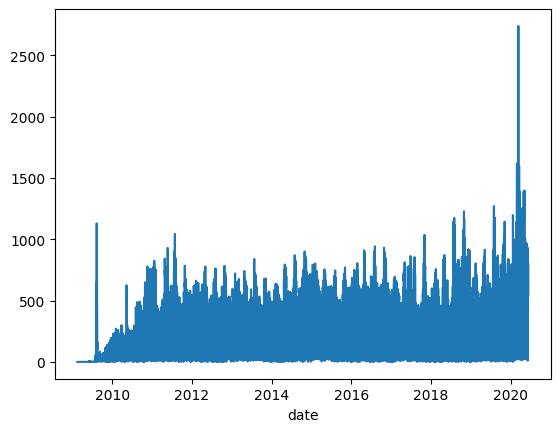

In [22]:
publication_trends = data['date'].dt.date.value_counts().sort_index()
publication_trends.plot()


Analyze publishing times

In [23]:
data['hour'] = data['date'].dt.hour
print(data['hour'].value_counts())


hour
0     1351472
14       7669
13       5965
16       5732
15       5701
12       5527
11       5033
20       3939
21       2800
17       2710
10       2476
18       2075
9        1829
19       1612
8        1469
22        704
23        227
7          93
1          82
4          67
6          57
2          48
3          27
5          14
Name: count, dtype: int64


# Publisher Analysis

Analyze the volume and focus of reporting by publisher

In [24]:
publisher_analysis = data.groupby('publisher')['headline'].count().sort_values(ascending=False)
print(publisher_analysis)


publisher
Paul Quintaro             228373
Lisa Levin                186979
Benzinga Newsdesk         150484
Charles Gross              96732
Monica Gerson              82380
                           ...  
MyConstant Chris Roper         1
milesyoung                     1
Nat                            1
mjintertrader                  1
Adam Weiner                    1
Name: headline, Length: 1034, dtype: int64
